
Random Forest Classifier:
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        99
         1.0       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



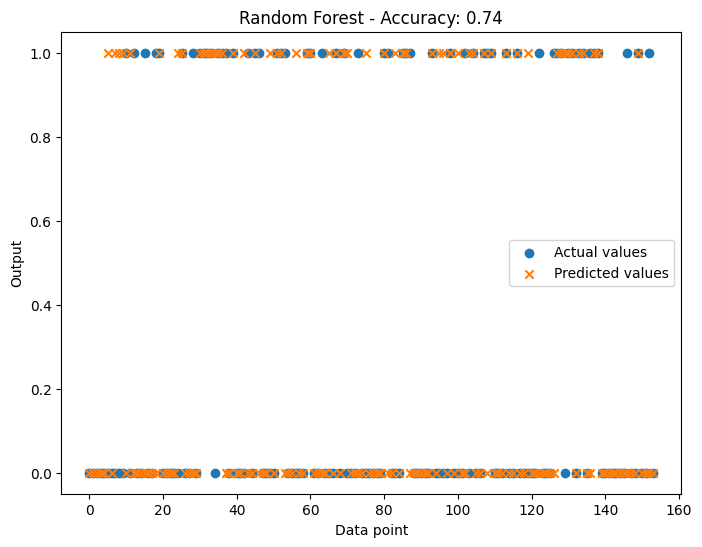


Gradient Boosting Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



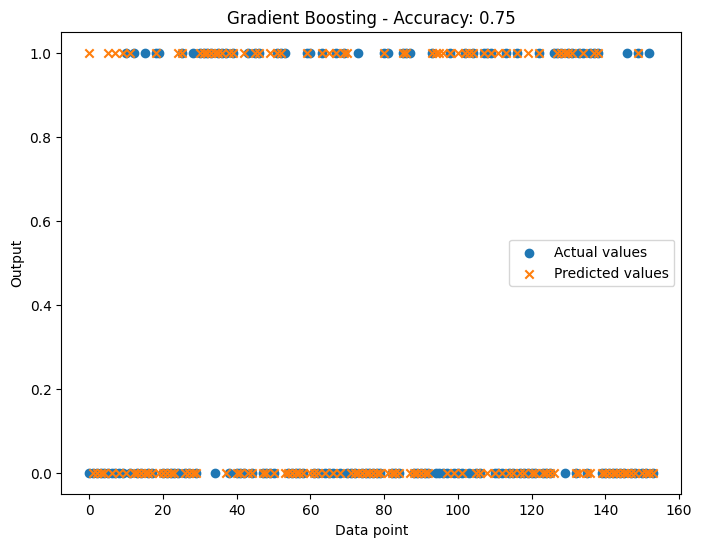


Support Vector Machine Classifier:
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        99
         1.0       0.64      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



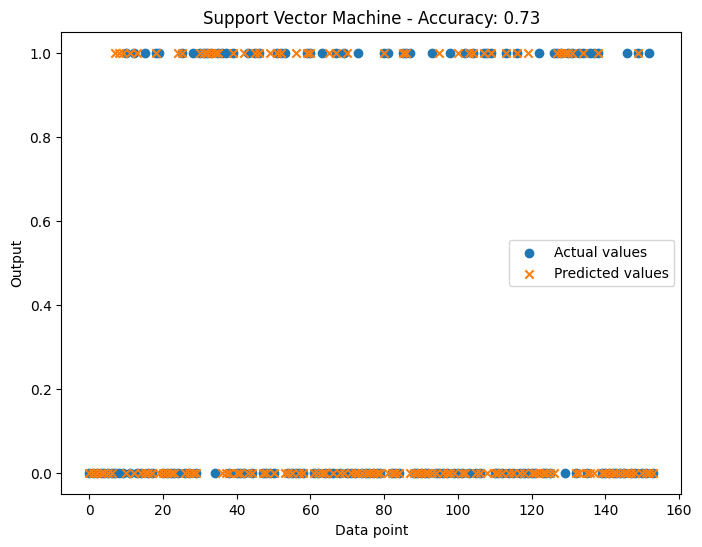


Logistic Regression Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



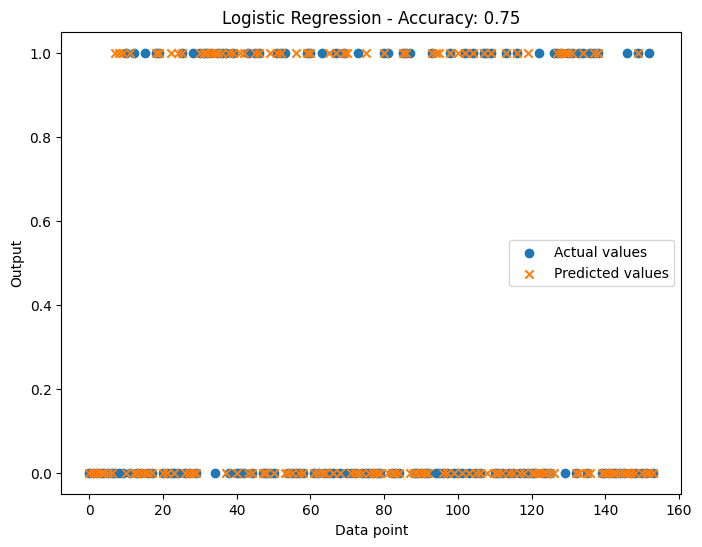


Stochastic Gradient Descent Classifier:
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        99
         1.0       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



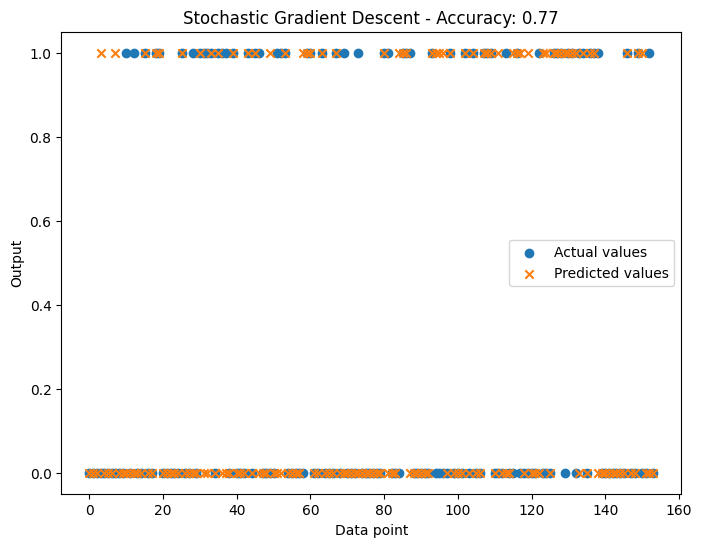


K-Nearest Neighbors Classifier:
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        99
         1.0       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



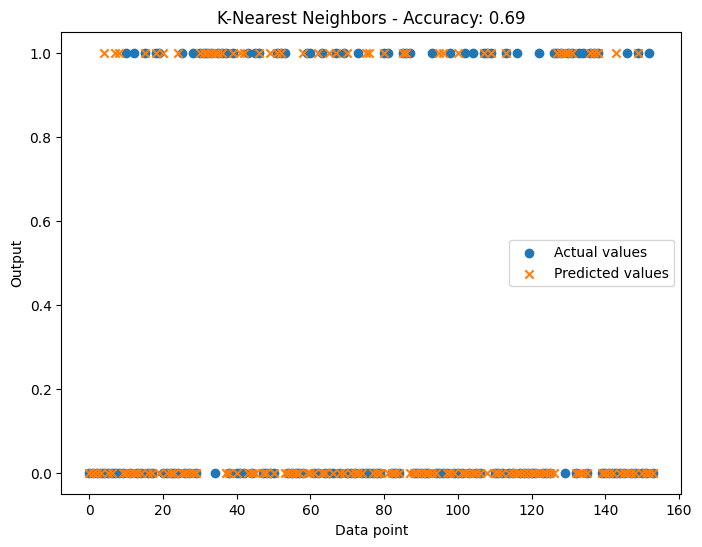


Decision Tree Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



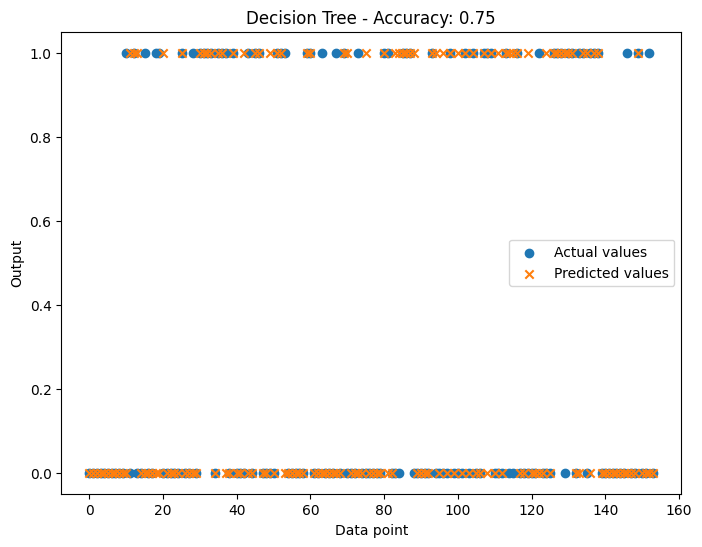


Naive Bayes Classifier:
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.80      0.81        99
         1.0       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



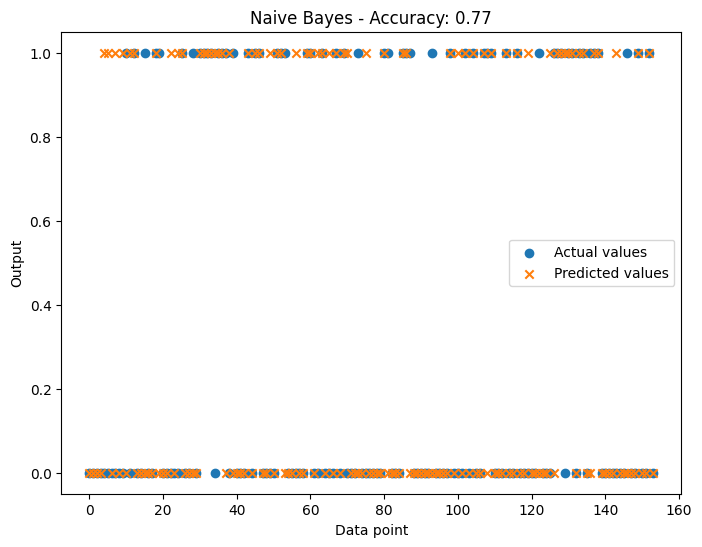

C:\Users\kr199\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        99
         1.0       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



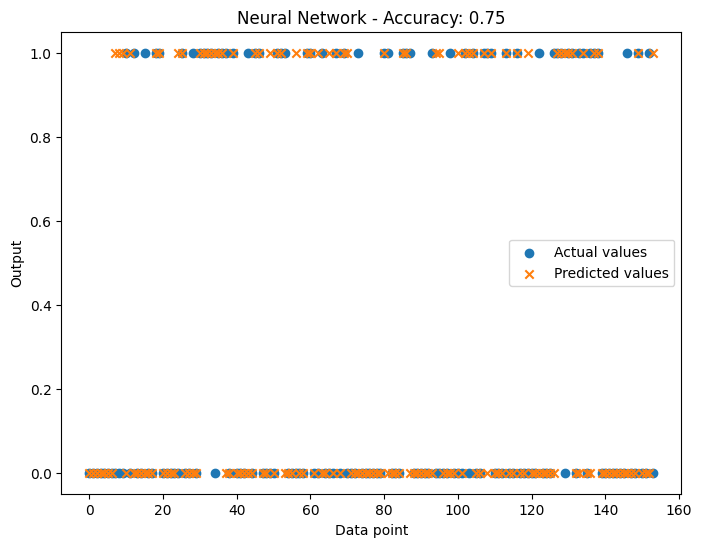


AdaBoost Classifier:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        99
         1.0       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



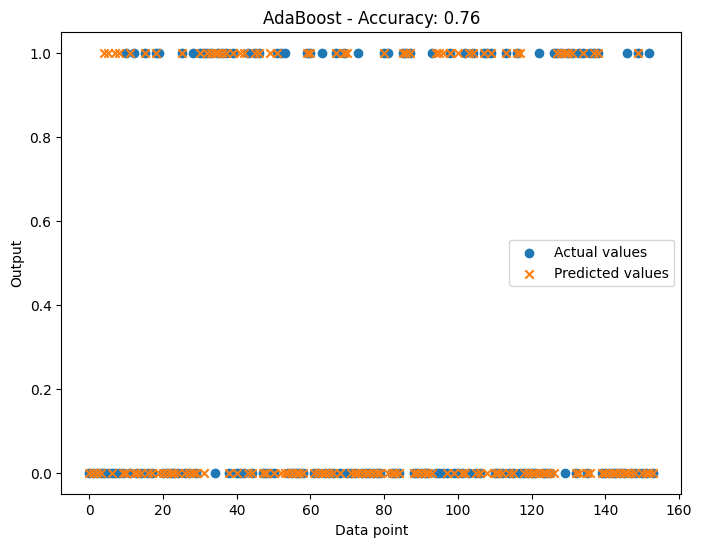

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load your dataset
df =pd.read_csv('notebook\data\Diabetes data.csv')

# Assuming you have a DataFrame 'df' with features and labels
imputer=SimpleImputer(strategy='median')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into features (X) and labels (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Loop through each classifier
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(len(y_test)), y_test, marker='o', label='Actual values')
    plt.scatter(np.arange(len(y_test)), y_pred, marker='x', label='Predicted values')
    plt.title(f"{name} - Accuracy: {accuracy:.2f}")
    plt.xlabel('Data point')
    plt.ylabel('Output')
    plt.legend()
    plt.show()
